In [67]:
from utils.RunDocumentExperiment import RunDocumentExperiment

from models.UrlsEmbedding import Clustering_algorithm, Scale

%matplotlib inline

In [72]:
direct = "/Volumes/Macintosh HD/Users/Andrea/Desktop/"

site = "cs.illinois.edu" # cs.illinois.edu  cs.ox.ac.uk  cs.priceton.edu  cs.stanford.edu
type_site = "NoConstraint" # ListConstraint  NoConstraint

db_best_left_with_b = "1000000" # 100000 = 100K ; 500000 = 500K ; 1000000 = 1M
window_best_left_with_b = "2" # 2 3 5 7
depth_best_left_with_b = "20" # 10 15 20
iteractions_left_with_b = "3" # 50 10 3
                 
db_best_normal = "500000" # 100000 = 100K ; 500000 = 500K ; 1000000 = 1M
window_best_normal = "2" # 2 3 5 7
depth_best_normal = "15" # 10 15 20
iteractions_normal = "10" # 50 10 3

use_tfidf = True
dimension_deduction = 100

clustering = Clustering_algorithm.HDBscan
intersect = True

scaling = Scale.l2
separator = "\t"

In [73]:
%time e = RunDocumentExperiment(direct, site, type_site, db_best_left_with_b, window_best_left_with_b, depth_best_left_with_b, iteractions_left_with_b, db_best_normal, window_best_normal, depth_best_normal, iteractions_normal, clustering, use_tfidf, separator, scaling, intersect, dimension_deduction)

scaling embeddings with L2 normalization
scaling embeddings with L2 normalization
use tfidf
Fitting tfidf...


Create tf-idf matrix, shape:  (651, 952)
Performing lsa dimensional reduction with dimension=100
Dimensionality reduction with lsa, shape:  (651, 100)
scaling embeddings with L2 normalization
Intersecting...
Original urls: 563
Intersected urls: 562
Original urls: 562
Intersected urls: 562
562==562
Original urls: 651


Intersected urls: 562
length content: 562
Start running HDBscan


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:193: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 562 but corresponding boolean dimension is 544
  a = np.mean(distances_row[mask])
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:219: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 562 but corresponding boolean dimension is 544
  for cur_label in set(labels) if not cur_label == label])


Homogeneity: 0.695221636797
Completeness: 0.563895902799
V-Measure core: 0.622710144524
Adjusted Rand index: 0.3992406880074079
Mutual Information: 0.536022958687
Silhouette: -0.069932326788
CPU times: user 6.36 s, sys: 226 ms, total: 6.59 s
Wall time: 6.63 s


In [74]:
e.get_dataframe_content()

,Adj Mutual info,Adj Rand index,Completeness,Homogeneity,Silhouette,V-Measure
HDBScan,0.54,0.40,0.56,0.70,-0.07,0.62


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/pyplot.py'>

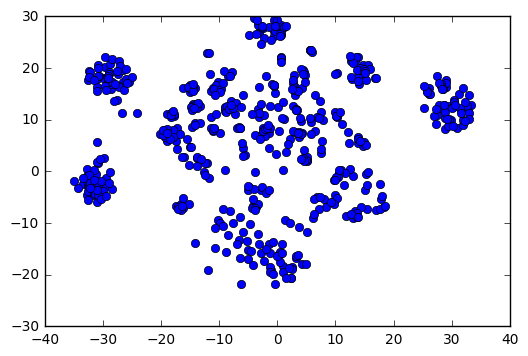

In [75]:
if use_tfidf:
    string = "TFIDF"
else:
    string = "doc2vec"

e.plot_normalized_content(direct + "PURE_" + string + "." + clustering.value)